# Resposta Impulso/Filtrar wave

Shape x = (231707, 2)
len x = 231707
Size x = 463414
fs = 44100
Shape x = (231707,)
len x = 231707
Size x = 231707
fs = 44100
bLk = [0. 0. 0. ... 0. 0. 1.]
Imp = [1. 0. 0. ... 0. 0. 0.]
len yLIR = 231707
len x = 231707
Shape yDelay = (231707, 2)
len yDelay = 231707
Size yDelay = 463414


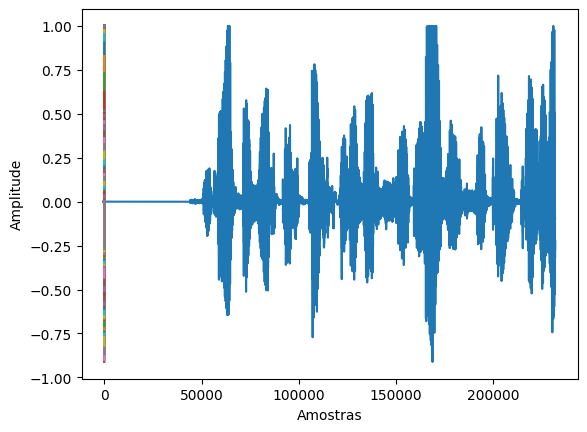

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import soundfile as sf

# Efeito Delay
delay = 1
#fs = 48000
x, fs = sf.read('audio.wav')

print('Shape x =', np.shape(x))
print('len x =', len(x))
print('Size x =', np.size(x))
print('fs =', fs)

if len(np.shape(x)) > 1:
    x = x[:,0]  # Pega só um canal

print('Shape x =', np.shape(x))
print('len x =', len(x))
print('Size x =', np.size(x))
print('fs =', fs)


d = int(delay * fs)
Imp = np.zeros(2*d)
Imp[0] = 1

#x = Imp

aLk = 1
bLk = np.hstack((np.zeros(d), [1]))

aRk= 1
bRk = 1

print('bLk =', bLk)
print('Imp =', Imp)

yLIR = ss.lfilter(bLk, aLk, x)
#yRIR = ss.lfilter(bRk, aRk, Imp)

print('len yLIR =', len(yLIR))
print('len x =', len(x))

x = np.array((x,yLIR))

yDelay = np.transpose(x)

print('Shape yDelay =', np.shape(yDelay))
print('len yDelay =', len(yDelay))
print('Size yDelay =', np.size(yDelay))

sf.write('audioDelay.wav', yDelay, fs)

plt.figure()
plt.plot(yLIR)
plt.plot(x)
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

